5.5 - Issue with the gradient
---

In [1]:
import pandas as pd

# Load the data
data_df = pd.read_csv('bike-sharing.csv')
data_df.head()

,temp,users
0,0.1964,120
1,0.2000,108
2,0.2270,82
3,0.2043,88
4,0.1508,41


### Rescaling data

In [2]:
# Create x/y arrays
x = 47*data_df.temp.values - 8 # Degrees Celsius
y = data_df.users.values

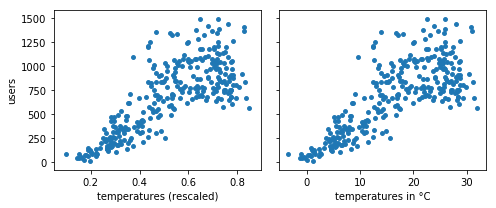

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

# Compare the two version
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 3))
ax1.scatter(data_df.temp, y, s=15)
ax1.set_xlabel('temperatures (rescaled)')
ax1.set_ylabel('users')
ax2.scatter(x, y, s=15)
ax2.set_xlabel('temperatures in °C')
plt.tight_layout()
plt.show()

In [4]:
import numpy as np

# Initialization
lr = 0.7
a, b = 0, 0
n_steps = 400

# Root mean square error (RMSE)
def rmse(y, y_pred):
    return np.sqrt(np.mean(np.square(y - y_pred)))

# Gradient descent
log_rmse = []
for step in range(n_steps):
    # Compute partial derivatives
    y_pred = a*x + b
    error = y - y_pred
    a_grad = -2*np.mean(x*error)
    b_grad = -2*np.mean(error)
    
    # Update parameters
    a -= lr*a_grad
    b -= lr*b_grad
    
    # Log RMSE score
    log_rmse.append(rmse(y, y_pred))

/Users/valentinmonney/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/Users/valentinmonney/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in square
  # Remove the CWD from sys.path while we load stuff.
/Users/valentinmonney/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in multiply
/Users/valentinmonney/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in add
  app.launch_new_instance()


If you run the code, you should get a RuntimeWarning which says that an overflow happened. This simply means that one instruction led to a number too large to be stored in the computer memory. It's likely that gradient descent diverged. Let's verify that by plotting the log_rmse variable.

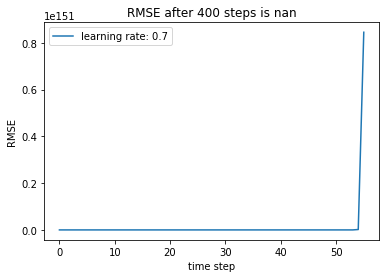

nan

In [7]:
# Plot RMSE values
plt.plot(log_rmse, label='learning rate: {}'.format(lr))
plt.title('RMSE after {} steps is {}'.format(n_steps, log_rmse[-1]))
plt.xlabel("time step")
plt.ylabel("RMSE")
plt.legend()
plt.show()

log_rmse[-1]

In [8]:
# Create x/y arrays
x = data_df.temp.values
y = data_df.users.values

In [16]:
# Initialization
lr = 0.7
a, b = 0, 0
n_steps = 400

# Gradient descent
log_a = [a]
log_b = [b]

for step in range(n_steps):
    # Compute partial derivatives
    y_pred = a*x + b
    error = y - y_pred
    a_grad = -2*np.mean(x*error)
    b_grad = -2*np.mean(error)
    
    # Update parameters
    a -= lr*a_grad
    b -= lr*b_grad
    
    # Log a, b values
    log_a.append(a)
    log_b.append(b)

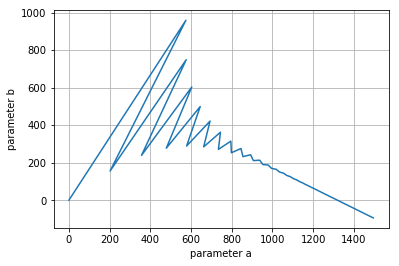

In [17]:
# Visualize steps
plt.plot(log_a, log_b)
plt.grid()
plt.xlabel('parameter a')
plt.ylabel('parameter b')
plt.show()

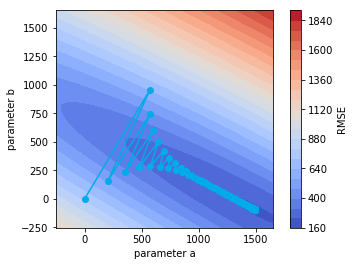

In [18]:
# Plot the error surface
def visualize_steps(fig, axis, log_a, log_b, x, y):
    # Define a grid of a,b parameters
    min_ab = min(min(log_a), min(log_b))
    max_ab = max(max(log_a), max(log_b))

    d = max_ab - min_ab
    min_ab -= d * 0.1
    max_ab += d * 0.1

    a = np.linspace(min_ab, max_ab, num=40)
    b = np.linspace(min_ab, max_ab, num=40)
    a_grid, b_grid = np.meshgrid(a, b)

    # Compute the RMSE score for each a,b pair on that grid
    rmse_grid = np.zeros_like(a_grid)

    for i in range(40):
        for j in range(40):
            a, b = a_grid[i, j], b_grid[i, j]
            rmse_grid[i, j] = rmse(a*x+b, y)

    # RMSE surface
    axis.set_aspect('equal', adjustable='box')
    mpl_contourset = axis.contourf(a_grid, b_grid, rmse_grid, 20, cmap=plt.cm.coolwarm)
    fig.colorbar(mpl_contourset, ax=axis, label='RMSE')

    # Plot the GD steps
    axis.plot(log_a, log_b, c='#00abe9')
    axis.scatter(log_a, log_b, c='#00abe9')

    # Set titles and labels
    axis.set_xlabel('parameter a')
    axis.set_ylabel('parameter b')

    axis.set_xlim(min_ab, max_ab)
    axis.set_ylim(min_ab, max_ab)
    
# Plot the error surface
fig = plt.figure()
visualize_steps(fig, fig.gca(), log_a, log_b, x, y)

5.6 - Standardization
---

In [19]:
from sklearn.preprocessing import scale

# Standardize x
x_standardized = scale(x)

print('Mean:', x_standardized.mean())
print('Standard deviation:', x_standardized.std())

Mean: -7.058371547285764e-17
Standard deviation: 1.0


In [26]:
# Initialization
lr = 0.1
a, b = 0, 0
n_steps = 400

# Gradient descent
log_a = [a]
log_b = [b]

for step in range(n_steps):
    # Compute partial derivatives
    y_pred = a*x_standardized + b
    error = y - y_pred
    a_grad = -2*np.mean(x_standardized*error)
    b_grad = -2*np.mean(error)
    
    # Update parameters
    a -= lr*a_grad
    b -= lr*b_grad
    
    # Log a, b values
    log_a.append(a)
    log_b.append(b)

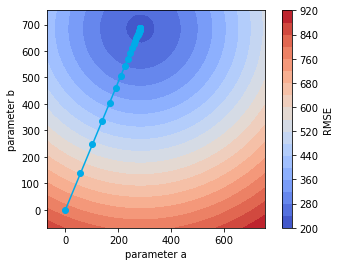

In [27]:
# Plot the error surface
fig = plt.figure()
visualize_steps(fig, fig.gca(), log_a, log_b, x_standardized, y)